In [2]:
import pandas as pd
import numpy as np
import graphlab as gl
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [3]:
df_work = pd.read_csv('Electronics_work.csv')

In [12]:
df_work['overall'].describe()

count    99999.000000
mean         4.231182
std          1.187015
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

Creating a matrix with reviewerID and productID using pivot table to better understand the data

In [4]:
Matrix = df_work.pivot_table(index=['reviewerID'],columns=['productID'],values='overall')

In [5]:
Matrix

productID,0528881469,0594451647,0594481813,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00023JE7U,B00023JJV6,B00023KG40,B00023KG4U,B00023MEL8,B00023NDLS,B00023NFCA,B00023XDYA,B000243DNA,B000243DOE
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00472881KT6WR48K907X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0103849GBVWICKXD4T6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0266076X6KPZ6CCHGVS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A027717628HVUA4XE5VL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A02850745KLGY02ZALLI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A055760637EV7Z72T33OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A05793033A673QTUT56XZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A06019711E8OUXS8ZX7L9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0655860XQH1M5Q8JH1M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above matrix is not helping because of data being large and many of the products not being rated as many times as required to 
make some meaning.

In [6]:
C = df_work['overall'].mean()
C

4.231182311823118

So the average rating of products from the complete data is 4.2

In [7]:
ratings = pd.DataFrame(df_work.groupby('productID')['overall'].count())
ratings.rename(columns = {'overall':'ratings_count'}, inplace=True)



In [8]:
ratings.head()

,ratings_count
productID,
0528881469,4
0594451647,5
0594481813,8
0972683275,219
1400501466,43


In [9]:
ratings = ratings.reset_index()

In [10]:
ratings.head()

,productID,ratings_count
0,0528881469,4
1,0594451647,5
2,0594481813,8
3,0972683275,219
4,1400501466,43


So this table ratings has productID and the number of ratings each product had been given.

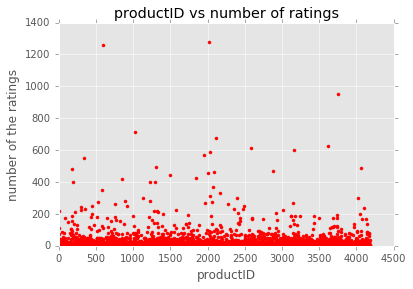

In [34]:
plt.plot(ratings['ratings_count'],'r.',label = 'ratings')
plt.xlabel('productID')
plt.ylabel('number of the ratings')
plt.title('productID vs number of ratings')

So from the above plot, it is evident that number of ratings for the products have greater concentration when ratings count is less than
100 and very few products have more than 500 ratings.

In [14]:
ratings_mean = pd.DataFrame(df_work.groupby('productID')['overall'].mean()).copy()
ratings_mean.rename(columns = {'overall':'ratings_mean'}, inplace=True)



In [15]:
ratings_mean = ratings_mean.reset_index()

In [16]:
ratings_mean.head()

,productID,ratings_mean
0,0528881469,1.750000
1,0594451647,4.200000
2,0594481813,4.000000
3,0972683275,4.461187
4,1400501466,3.953488


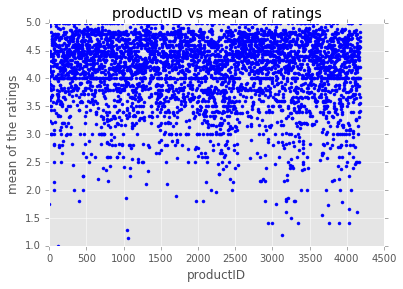

In [33]:
plt.plot(ratings_mean['ratings_mean'],'b.',label = 'ratings')
plt.xlabel('productID')
plt.ylabel('mean of the ratings')
plt.title('productID vs mean of ratings')

In [20]:
each_ratings_count = pd.DataFrame(df_work.groupby('overall')['overall'].count())
each_ratings_count.rename(columns = {'overall':'each_ratings_count'}, inplace=True)



In [21]:
each_ratings_count

,each_ratings_count
overall,
1,6534
2,4792
3,7982
4,20405
5,60286


In [22]:
each_ratings_count = each_ratings_count.reset_index()

In [23]:
each_ratings_count

,overall,each_ratings_count
0,1,6534
1,2,4792
2,3,7982
3,4,20405
4,5,60286


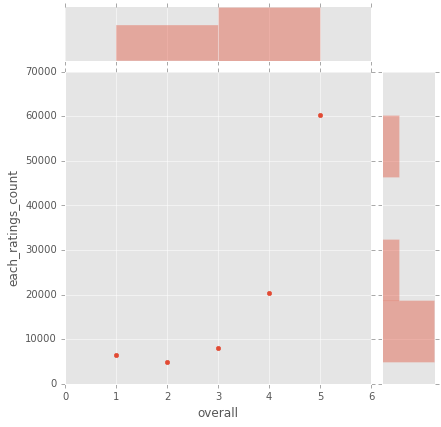

In [36]:
import seaborn as sns
sns.jointplot(x='overall', y='each_ratings_count', data=each_ratings_count)



The above plot shows number of ratings each of (1,2,3,4,5) had been given. It is clear that 5 rating had been given the most 
number of times and 2 rating the least number of times.